In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score
from scipy.stats import ks_2samp
from imblearn.over_sampling import SMOTE
#import shap



In [2]:
df = pd.read_excel('archive(1)/dataset.xlsx')

df.head()



,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].map({'positive': 1, 'negative': 0})

# Map detected/not_detected and positive/negative to 1 and 0
df = df.replace({'positive': 1, 'negative': 0, 'detected': 1, 'not_detected': 0})

df['SARS-Cov-2 exam result'].value_counts(normalize=True)

0    0.901134
1    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

In [4]:
df_null_pct = df.isna().mean().round(4) * 100

df_null_pct.sort_values(ascending=False)

Prothrombin time (PT), Activity                          100.0
D-Dimer                                                  100.0
Mycoplasma pneumoniae                                    100.0
Urine - Sugar                                            100.0
Partial thromboplastin time (PTT)                        100.0
                                                         ...  
Patient addmited to semi-intensive unit (1=yes, 0=no)      0.0
Patient addmited to regular ward (1=yes, 0=no)             0.0
SARS-Cov-2 exam result                                     0.0
Patient age quantile                                       0.0
Patient ID                                                 0.0
Length: 111, dtype: float64

<AxesSubplot:ylabel='Frequency'>

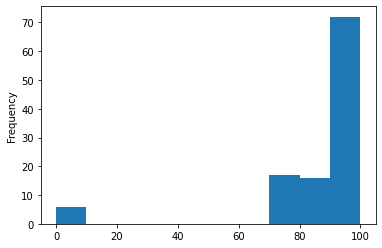

In [5]:
df_null_pct.plot(kind='hist')


In [6]:
nulls = df_null_pct[df_null_pct > 90]

df = df[[col for col in df.columns if col not in nulls]]

df.head()



,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [7]:
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'In

In [8]:
features = [col for col in df.columns if col not in ['Patient ID', 
                                                    'Patient addmited to regular ward (1=yes, 0=no)',
                                                    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                                                    'Patient addmited to intensive care unit (1=yes, 0=no)',
                                                    'SARS-Cov-2 exam result']]

df[features].var()

Patient age quantile                                33.384166
Hematocrit                                           1.001661
Hemoglobin                                           1.001661
Platelets                                            1.001664
Mean platelet volume                                 1.001672
Red blood Cells                                      1.001664
Lymphocytes                                          1.001664
Mean corpuscular hemoglobin concentration (MCHC)     1.001664
Leukocytes                                           1.001664
Basophils                                            1.001664
Mean corpuscular hemoglobin (MCH)                    1.001664
Eosinophils                                          1.001664
Mean corpuscular volume (MCV)                        1.001664
Monocytes                                            1.001667
Red blood cell distribution width (RDW)              1.001664
Respiratory Syncytial Virus                          0.036957
Influenz

In [9]:
df.drop('Parainfluenza 2', axis=1, inplace=True)
features.remove('Parainfluenza 2')


In [10]:
df['has_disease'] = df[df.columns[20:]].sum(axis=1)

df.loc[df['has_disease'] > 1, 'has_disease'] = 1

df['has_disease'].value_counts(normalize=True)


0.0    0.865344
1.0    0.134656
Name: has_disease, dtype: float64

In [11]:
df[df['has_disease'] == 1]['SARS-Cov-2 exam result'].value_counts(normalize=True)


0    0.981579
1    0.018421
Name: SARS-Cov-2 exam result, dtype: float64

In [12]:
df_clean = df.copy()

df[df.columns[20:]] = df[df.columns[20:]].fillna(0)

In [13]:
for feature in df[df.columns[6:20]]:
    df_age_var = df.dropna(axis=0, subset=['Patient age quantile', feature]).loc[:, ['Patient age quantile',
                                                                                          feature]]
    missing = df[feature].isnull()
    age_missing = pd.DataFrame(df['Patient age quantile'][missing])

    X = df_age_var[['Patient age quantile']]
    y = df_age_var[feature]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lm = LinearRegression().fit(X_train, y_train)

    df.loc[df[feature].isna(), feature] = lm.predict(age_missing)
    
df.head()


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test",has_disease
0,44477f75e8169d2,13,0,0,0,0,0.034267,0.022490,-0.070137,0.061030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,a46b4402a0e5696,8,0,0,0,0,-0.041190,-0.019496,0.052728,-0.040502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f7d619a94f97c45,5,0,0,0,0,-0.086463,-0.044687,0.126447,-0.101422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,d9e41465789c2b5,15,0,0,0,0,0.064449,0.039284,-0.119284,0.101643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
df.isna().sum().sum()


0

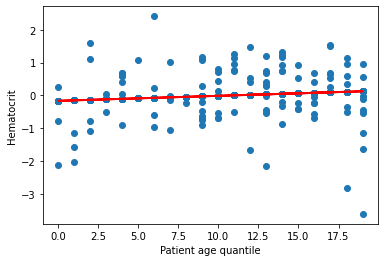

In [15]:
df_age_var = df.dropna(axis=0, subset=['Patient age quantile', 'Hematocrit']).loc[:, ['Patient age quantile',
                                                                                      'Hematocrit']]

missing_hem = df['Hematocrit'].isnull()
age_missing_hem = pd.DataFrame(df['Patient age quantile'][missing_hem])

X = df_age_var[['Patient age quantile']]
y = df_age_var['Hematocrit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', lw=2)
plt.xlabel('Patient age quantile')
plt.ylabel('Hematocrit')
plt.show()


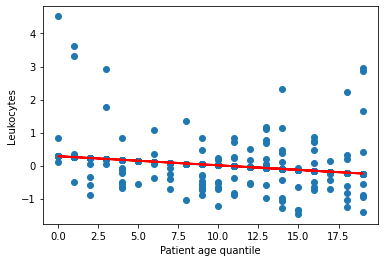

In [16]:
df_age_var = df.dropna(axis=0, subset=['Patient age quantile', 'Leukocytes']).loc[:, ['Patient age quantile',
                                                                                      'Leukocytes']]

missing_leu = df['Leukocytes'].isnull()
age_missing_leu = pd.DataFrame(df['Patient age quantile'][missing_leu])

X = df_age_var[['Patient age quantile']]
y = df_age_var['Leukocytes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', lw=2)
plt.xlabel('Patient age quantile')
plt.ylabel('Leukocytes')
plt.show()



In [17]:
def fit_and_print(model):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    #CM and Acc
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))  
    print("Classification Report: \n", classification_report(y_test, y_pred))  
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))   
    print("Recall Score:", recall_score(y_test, y_pred))
    #AUC and KS
    print("AUC: ", roc_auc_score(y_test, y_pred))
    print("KS: ", ks_2samp(y_pred[y_test == 0], y_pred[y_test == 1]).statistic)
    
X = df[features].values 
y = df['SARS-Cov-2 exam result'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print("Split between test and train!")

#Apply RF
rf = RandomForestClassifier(n_estimators=100, max_features='auto', random_state=42)  

fit_and_print(rf)


Split between test and train!
Confusion Matrix: 
 [[1016    1]
 [ 107    5]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1017
           1       0.83      0.04      0.08       112

    accuracy                           0.90      1129
   macro avg       0.87      0.52      0.52      1129
weighted avg       0.90      0.90      0.86      1129

Accuracy Score:  0.9043401240035429
Recall Score: 0.044642857142857144
AUC:  0.5218297864868662
KS:  0.04365957297373227


In [18]:
print('Total Columns: ', df_clean.shape[1])
df_clean.isna().sum(axis=1).value_counts()

Total Columns:  39


32    3596
16     917
30     458
2      263
14     166
18     139
0       99
3        4
27       1
29       1
dtype: int64

In [19]:
df_red = df_clean[df_clean.isna().sum(axis=1) < 26]

df_red.head()


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test",has_disease
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0
8,8bb9d64f0215244,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
9,5f1ed301375586c,17,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
13,0fbafd910aa8078,13,0,0,0,0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0


In [20]:
df_null_pct = df_red.isna().mean().round(4) * 100

df_null_pct.sort_values(ascending=False)


Influenza A, rapid test                                  77.20
Influenza B, rapid test                                  77.20
Mean platelet volume                                     62.28
Monocytes                                                62.15
Leukocytes                                               62.09
Mean corpuscular volume (MCV)                            62.09
Eosinophils                                              62.09
Mean corpuscular hemoglobin (MCH)                        62.09
Basophils                                                62.09
Red blood cell distribution width (RDW)                  62.09
Mean corpuscular hemoglobin concentration (MCHC)         62.09
Red blood Cells                                          62.09
Platelets                                                62.09
Hemoglobin                                               62.09
Hematocrit                                               62.09
Lymphocytes                                            

In [21]:
df_red = df_red[df_red['Leukocytes'].notna()]

df_null_pct = df_red.isna().mean().round(4) * 100

df_null_pct.sort_values(ascending=False)


Influenza B, rapid test                                  67.44
Influenza A, rapid test                                  67.44
CoronavirusNL63                                          39.20
Chlamydophila pneumoniae                                 39.20
Respiratory Syncytial Virus                              39.20
Influenza A                                              39.20
Influenza B                                              39.20
Parainfluenza 1                                          39.20
Rhinovirus/Enterovirus                                   39.20
Parainfluenza 3                                          39.20
Coronavirus HKU1                                         39.20
Adenovirus                                               39.20
Parainfluenza 4                                          39.20
Coronavirus229E                                          39.20
CoronavirusOC43                                          39.20
Inf A H1N1 2009                                        

In [22]:
df_red.loc[df_red['Mean platelet volume '].isna(), 'Mean platelet volume '] = df_red['Mean platelet volume '].mean()

df_red.loc[df_red['Monocytes'].isna(), 'Monocytes'] = df_red['Monocytes'].mean()


In [23]:
cols_to_remove = [c for c in df_red.columns[20:-1]]
df_feat = df_red.drop(cols_to_remove, axis=1)

#update features
features = [c for c in df_feat.columns if c not in ['Patient ID', 'SARS-Cov-2 exam result',
                                                   'Patient addmited to regular ward (1=yes, 0=no)',
                                                   'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                                                   'Patient addmited to intensive care unit (1=yes, 0=no)']]

df_feat.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),has_disease
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,1.0
8,8bb9d64f0215244,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0
15,6c9d3323975b082,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,...,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,1.0
18,d3ea751f3db9de9,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,...,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,1.0
22,2c2eae16c12a18a,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,...,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0.0


In [24]:
df_feat.isna().sum().sum()

0

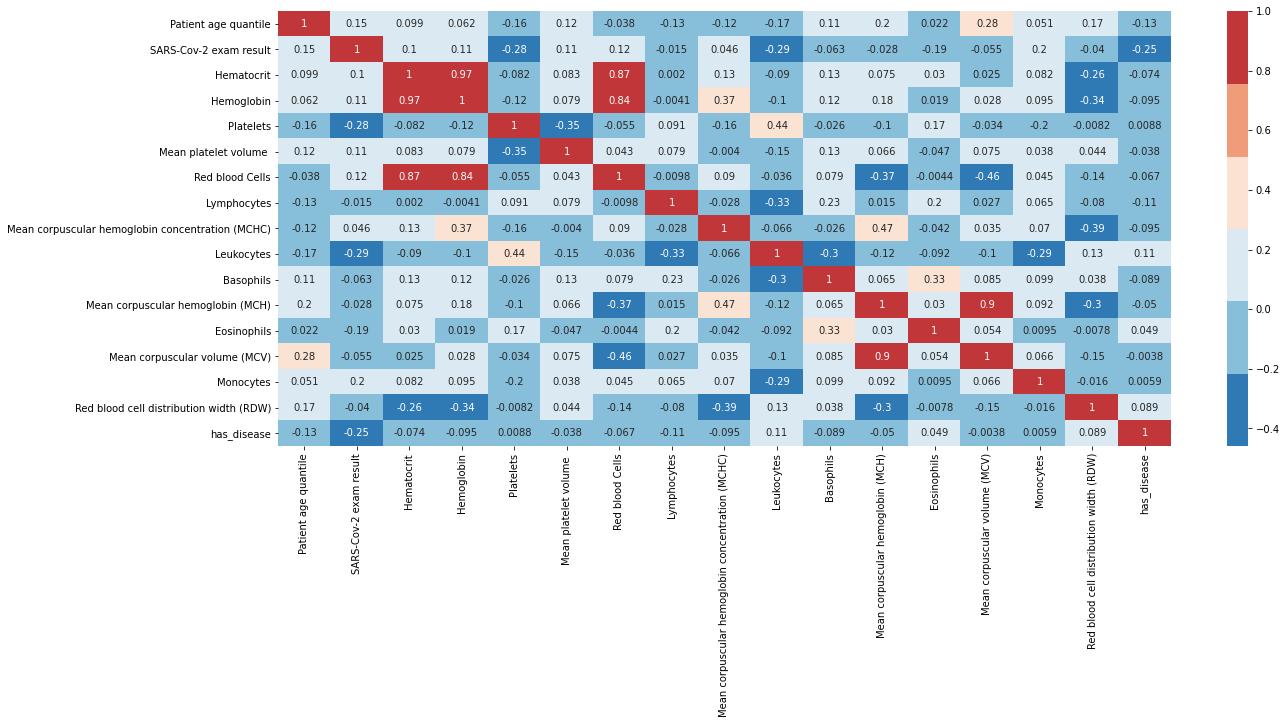

In [25]:
corr = df_feat.drop(['Patient ID', 'Patient addmited to regular ward (1=yes, 0=no)', 
             'Patient addmited to semi-intensive unit (1=yes, 0=no)',
             'Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1).corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.color_palette('RdBu_r'), 
            annot=True)

plt.show()

In [26]:
df_feat = df_feat.drop(['Mean corpuscular hemoglobin (MCH)', 'Hematocrit', 'Hemoglobin'], axis=1)
#update features
features = [f for f in features if f not in ['Mean corpuscular hemoglobin (MCH)', 'Hematocrit', 'Hemoglobin']]


In [27]:
X = df_feat[features]
y = df_feat['SARS-Cov-2 exam result'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print("Split between test and train!")

#Apply RF
rf = RandomForestClassifier(n_estimators=100, max_features='auto', random_state=42)  
fit_and_print(rf)

Split between test and train!
Confusion Matrix: 
 [[101   3]
 [ 11   6]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       104
           1       0.67      0.35      0.46        17

    accuracy                           0.88       121
   macro avg       0.78      0.66      0.70       121
weighted avg       0.87      0.88      0.87       121

Accuracy Score:  0.8842975206611571
Recall Score: 0.35294117647058826
AUC:  0.6620475113122172
KS:  0.3240950226244344


In [28]:
random_grid = {'n_estimators': [10, 50, 100, 200, 500],
            'max_features': ['auto', 'sqrt', 'log2', 5, 10, 30],
            'max_depth': [2, 8, 16, 32, 64, 128],
            'min_samples_split': [1,2,4,8,16,24],
            'min_samples_leaf': [1,2,5,10,15,30]}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                            n_iter = 200, cv = 5, scoring = 'recall', 
                            verbose=0, random_state=42, n_jobs = -1)

# Fit the random search model
fit_and_print(rf_random)
print(rf_random.best_params_)


Confusion Matrix: 
 [[97  7]
 [ 8  9]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       104
           1       0.56      0.53      0.55        17

    accuracy                           0.88       121
   macro avg       0.74      0.73      0.74       121
weighted avg       0.87      0.88      0.87       121

Accuracy Score:  0.8760330578512396
Recall Score: 0.5294117647058824
AUC:  0.7310520361990951
KS:  0.46210407239819007
{'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 10, 'max_depth': 128}


In [29]:
smt = SMOTE(k_neighbors=5, random_state=42)
X_train, y_train = smt.fit_sample(X_train, y_train)

np.bincount(y_train)


array([415, 415])

In [30]:
rf = RandomForestClassifier(n_estimators=100, max_features='auto', random_state=42)  
fit_and_print(rf)


Confusion Matrix: 
 [[100   4]
 [  6  11]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       104
           1       0.73      0.65      0.69        17

    accuracy                           0.92       121
   macro avg       0.84      0.80      0.82       121
weighted avg       0.91      0.92      0.92       121

Accuracy Score:  0.9173553719008265
Recall Score: 0.6470588235294118
AUC:  0.8042986425339366
KS:  0.6085972850678733


In [31]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                            n_iter = 300, cv = 5, scoring = 'recall', 
                            verbose=0, random_state=42, n_jobs = -1)
# Fit the random search model
fit_and_print(rf_random)
print(rf_random.best_params_)

Confusion Matrix: 
 [[97  7]
 [ 6 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       104
           1       0.61      0.65      0.63        17

    accuracy                           0.89       121
   macro avg       0.78      0.79      0.78       121
weighted avg       0.90      0.89      0.89       121

Accuracy Score:  0.8925619834710744
Recall Score: 0.6470588235294118
AUC:  0.7898755656108597
KS:  0.5797511312217195
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 8}


In [32]:
random_grid = {
    'penalty': ['l1', 'l2'],
    'C': [100, 10, 1, 0.1, 0.01, 0.001]
    }
lr = LogisticRegression()

lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, 
                            n_iter = 100, cv = 5, scoring = 'recall', 
                            verbose=0, random_state=42, n_jobs = -1)

# Fit the random search model
fit_and_print(lr_random)
print(lr_random.best_params_)


/home/ayush/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Confusion Matrix: 
 [[90 14]
 [ 5 12]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.87      0.90       104
           1       0.46      0.71      0.56        17

    accuracy                           0.84       121
   macro avg       0.70      0.79      0.73       121
weighted avg       0.88      0.84      0.86       121

Accuracy Score:  0.8429752066115702
Recall Score: 0.7058823529411765
AUC:  0.785633484162896
KS:  0.5712669683257918
{'penalty': 'l2', 'C': 100}


In [33]:
random_grid = {
    'n_neighbors': [2, 3, 5, 8, 10, 12, 15, 20, 30],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
    }
knn = KNeighborsClassifier()

knn_random = RandomizedSearchCV(estimator = knn, param_distributions = random_grid, 
                            n_iter = 100, cv = 5, scoring = 'recall', 
                            verbose=0, random_state=42, n_jobs = -1)

# Fit the random search model
fit_and_print(knn_random)
print(knn_random.best_params_)

/home/ayush/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Confusion Matrix: 
 [[80 24]
 [ 7 10]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       104
           1       0.29      0.59      0.39        17

    accuracy                           0.74       121
   macro avg       0.61      0.68      0.61       121
weighted avg       0.83      0.74      0.78       121

Accuracy Score:  0.743801652892562
Recall Score: 0.5882352941176471
AUC:  0.6787330316742082
KS:  0.3574660633484163
{'weights': 'distance', 'p': 1, 'n_neighbors': 2}


In [34]:
random_grid = {'C': [0.1, 1, 10, 100, 1000], 
               'gamma': ['auto', 1, 0.1, 0.01, 0.001, 0.0001], 
               'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}  

svc = SVC()

svc_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, 
                            n_iter = 200, cv = 5, scoring = 'recall', 
                            verbose=0, random_state=42, n_jobs = -1)

# Fit the random search model
fit_and_print(svc_random)
print(svc_random.best_params_)

/home/ayush/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 120 is smaller than n_iter=200. Running 120 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Confusion Matrix: 
 [[ 8 96]
 [ 0 17]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.08      0.14       104
           1       0.15      1.00      0.26        17

    accuracy                           0.21       121
   macro avg       0.58      0.54      0.20       121
weighted avg       0.88      0.21      0.16       121

Accuracy Score:  0.2066115702479339
Recall Score: 1.0
AUC:  0.5384615384615384
KS:  0.07692307692307693
{'kernel': 'sigmoid', 'gamma': 1, 'C': 0.1}


In [35]:
import xgboost as xgb

random_grid = {"n_estimators": [100, 500, 1000],
              "learning rate": [0.1, 0.05, 0.01],
              "max_depth": [2, 8, 16, 64, 128], 
              "colsample_bytree": [0.3, 0.8, 1],
              "gamma": [0,1,5]}  

xgb_clf = xgb.XGBClassifier(objective='binary:logistic')

xgb_random = RandomizedSearchCV(estimator = xgb_clf, param_distributions = random_grid, 
                            n_iter = 200, cv = 5, scoring = 'recall', 
                            verbose=0, random_state=42, n_jobs = -1)

# Fit the random search model
fit_and_print(xgb_random)
print(xgb_random.best_params_)

[15:48:41] WARNING: /tmp/pip-build-vnthzb4d/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/learner.cc:516: 
Parameters: { learning rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Confusion Matrix: 
 [[97  7]
 [ 7 10]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       104
           1       0.59      0.59      0.59        17

    accuracy                           0.88       121
   macro avg       0.76      0.76      0.76       121
weighted avg       0.88      0.88      0.88       121

Accuracy Score:  0.8842975206611571
Recall Score: 0.5882352941176471
AUC:  0.7604638009049774
KS:  0.5209276018099548
{'n_estimators': 100, 'max_depth': 128, 'learning rate': 0.01, 'gamma': 0, 'colsample_bytree'

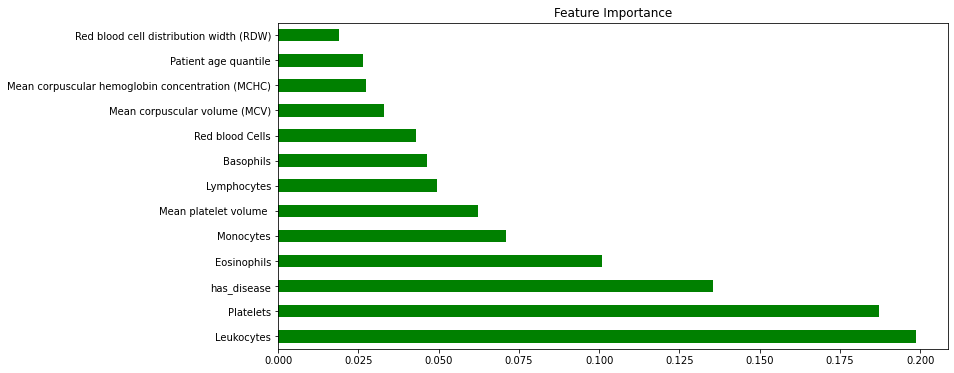

Leukocytes                                          19.865826
Platelets                                           18.717028
has_disease                                         13.551232
Eosinophils                                         10.098203
Monocytes                                            7.092365
Mean platelet volume                                 6.228050
Lymphocytes                                          4.939001
Basophils                                            4.627707
Red blood Cells                                      4.302666
Mean corpuscular volume (MCV)                        3.295114
Mean corpuscular hemoglobin concentration (MCHC)     2.727161
Patient age quantile                                 2.652841
Red blood cell distribution width (RDW)              1.902806
Name: importance, dtype: float64


In [36]:
feature_importances = pd.DataFrame(rf_random.best_estimator_.feature_importances_,
                                index = features,
                                    columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(12,6))
feature_importances.importance.plot(kind='barh', color='green')
plt.title('Feature Importance')
plt.show()
feature_importances.style.format({'importance': '{:.1%}'.format})
print(feature_importances.importance*100)
